In [6]:
%load_ext autoreload
%autoreload 2
import os
from read_dd import read_data
line = os.path.join('image', '0.png')
room_type,poly,doors_, walls,out=read_data(line)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# 6部屋 + 5ドア + 1エントランス
room_type

[3, 4, 1, 3, 2, 5, 17, 17, 17, 17, 17, 15]

In [8]:
poly

[4, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [9]:
# ドアの位置を表す座標[始点X, 始点Y, 終点X, 終点Y]のリスト
doors_

[[108.0, 145.0, 108.0, 155.0],
 [108.0, 155.0, 110.0, 155.0],
 [110.0, 155.0, 110.0, 145.0],
 [110.0, 145.0, 108.0, 145.0],
 [114.0, 158.0, 114.0, 160.0],
 [114.0, 160.0, 125.0, 160.0],
 [125.0, 160.0, 125.0, 158.0],
 [125.0, 158.0, 114.0, 158.0],
 [114.0, 127.0, 114.0, 129.0],
 [114.0, 129.0, 124.0, 129.0],
 [124.0, 129.0, 124.0, 127.0],
 [124.0, 127.0, 114.0, 127.0],
 [145.0, 60.0, 145.0, 84.0],
 [145.0, 84.0, 147.0, 84.0],
 [147.0, 84.0, 147.0, 60.0],
 [147.0, 60.0, 145.0, 60.0],
 [134.0, 204.0, 134.0, 206.0],
 [134.0, 206.0, 178.0, 206.0],
 [178.0, 206.0, 178.0, 204.0],
 [178.0, 204.0, 134.0, 204.0],
 [165.0, 38.0, 165.0, 52.0],
 [165.0, 52.0, 167.0, 52.0],
 [167.0, 52.0, 167.0, 38.0],
 [167.0, 38.0, 165.0, 38.0]]

In [38]:
# [始点X, 始点Y, 終点X, 終点Y, -1, 部屋タイプID, 部屋のindex, -1, 0]
walls[:5]

[[72.0, 161.0, 72.0, 220.0, -1, 3, 0, -1, 0],
 [72.0, 220.0, 124.0, 220.0, -1, 3, 0, -1, 0],
 [124.0, 220.0, 124.0, 161.0, -1, 3, 0, -1, 0],
 [124.0, 161.0, 72.0, 161.0, -1, 3, 0, -1, 0],
 [72.0, 130.0, 72.0, 157.0, -1, 4, 1, -1, 0]]

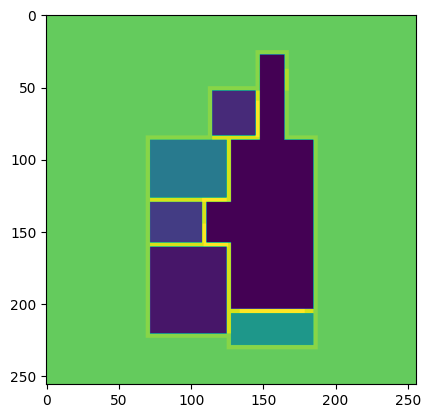

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img = np.asarray(Image.open(line))
plt.imshow(img[:, :, 1])

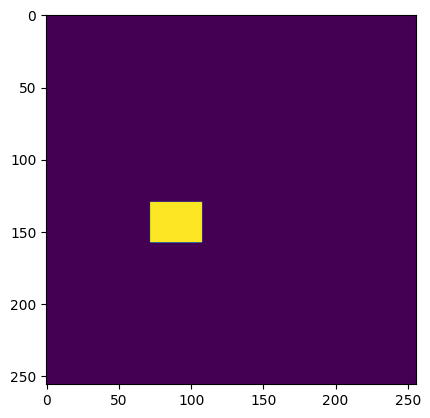

In [17]:
# type=3はどれ？
plt.imshow(img[:, :, 1]==3)

In [36]:
# 種別が3のものを見るには(3は4に変換されていることに注意．house gan では種別を独自に再定義している read_dd.pyの#156)
walls_4 = [wall for wall in walls if wall[5] == 4]
walls_4

[[72.0, 130.0, 72.0, 157.0, -1, 4, 1, -1, 0],
 [72.0, 157.0, 107.0, 157.0, -1, 4, 1, -1, 0],
 [107.0, 157.0, 107.0, 130.0, -1, 4, 1, -1, 0],
 [107.0, 130.0, 72.0, 130.0, -1, 4, 1, -1, 0]]

In [39]:
out

1

In [41]:
import json
with open('sample_output/0.json', 'r') as file:
    data = json.load(file)

In [43]:
data['room_type']

[3, 4, 1, 3, 2, 5, 17, 17, 17, 17, 17, 15]

In [44]:
data['boxes'] # 左上と右下のxy それぞれの部屋分(ドア，エントランス含む)

[[72.0, 161.0, 124.0, 220.0],
 [72.0, 130.0, 107.0, 157.0],
 [111.0, 28.0, 184.0, 203.0],
 [72.0, 87.0, 124.0, 126.0],
 [115.0, 53.0, 144.0, 83.0],
 [128.0, 207.0, 184.0, 228.0],
 [108.0, 145.0, 110.0, 155.0],
 [114.0, 158.0, 125.0, 160.0],
 [114.0, 127.0, 124.0, 129.0],
 [145.0, 60.0, 147.0, 84.0],
 [134.0, 204.0, 178.0, 206.0],
 [165.0, 38.0, 167.0, 52.0]]

In [74]:
# [始点X座標, 始点Y座標, 終点X座標, 終点Y座標, 部屋タイプID, 接続がある隣接の部屋のタイプ]
data['edges'][:10]
# 最後の要素が0なのは，外側との隣接？

[[72.0, 161.0, 72.0, 220.0, 3, 0],
 [72.0, 220.0, 124.0, 220.0, 3, 0],
 [124.0, 220.0, 124.0, 161.0, 3, 0],
 [124.0, 161.0, 72.0, 161.0, 3, 1],
 [72.0, 130.0, 72.0, 157.0, 4, 0],
 [72.0, 157.0, 107.0, 157.0, 4, 0],
 [107.0, 157.0, 107.0, 130.0, 4, 1],
 [107.0, 130.0, 72.0, 130.0, 4, 0],
 [148.0, 28.0, 148.0, 87.0, 1, 2],
 [148.0, 87.0, 128.0, 87.0, 1, 0]]

In [77]:
[edge for edge in data['edges'] if edge[-2] == 17]

[[108.0, 145.0, 108.0, 155.0, 17, 4],
 [108.0, 155.0, 110.0, 155.0, 17, 0],
 [110.0, 155.0, 110.0, 145.0, 17, 1],
 [110.0, 145.0, 108.0, 145.0, 17, 0],
 [114.0, 158.0, 114.0, 160.0, 17, 0],
 [114.0, 160.0, 125.0, 160.0, 17, 3],
 [125.0, 160.0, 125.0, 158.0, 17, 0],
 [125.0, 158.0, 114.0, 158.0, 17, 1],
 [114.0, 127.0, 114.0, 129.0, 17, 0],
 [114.0, 129.0, 124.0, 129.0, 17, 1],
 [124.0, 129.0, 124.0, 127.0, 17, 3],
 [124.0, 127.0, 114.0, 127.0, 17, 0],
 [145.0, 60.0, 145.0, 84.0, 17, 2],
 [145.0, 84.0, 147.0, 84.0, 17, 0],
 [147.0, 84.0, 147.0, 60.0, 17, 1],
 [147.0, 60.0, 145.0, 60.0, 17, 0],
 [134.0, 204.0, 134.0, 206.0, 17, 0],
 [134.0, 206.0, 178.0, 206.0, 17, 5],
 [178.0, 206.0, 178.0, 204.0, 17, 0],
 [178.0, 204.0, 134.0, 204.0, 17, 1]]

3


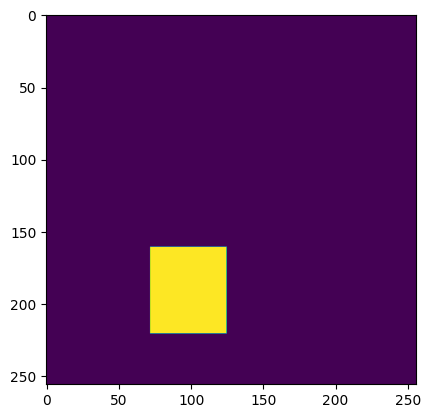

In [70]:
# 例えばroom_type=4(元の画像では3)の右下-右上線分に隣接しているのはindex=1
# room_typeの1番目([0])のタイプは3．3は元の画像のタイプ=1
print(data['room_type'][0])
plt.imshow(img[:, :, 2]==1)

In [92]:
[edge for edge in data['edges'] if edge[4] == 1]

[[148.0, 28.0, 148.0, 87.0, 1, 2],
 [148.0, 87.0, 128.0, 87.0, 1, 0],
 [128.0, 87.0, 128.0, 130.0, 1, 0],
 [128.0, 130.0, 111.0, 130.0, 1, 3],
 [111.0, 130.0, 111.0, 157.0, 1, 4],
 [111.0, 157.0, 128.0, 157.0, 1, 3],
 [128.0, 157.0, 128.0, 203.0, 1, 0],
 [128.0, 203.0, 184.0, 203.0, 1, 5],
 [184.0, 203.0, 184.0, 87.0, 1, 0],
 [184.0, 87.0, 164.0, 87.0, 1, 0],
 [164.0, 87.0, 164.0, 28.0, 1, 0],
 [164.0, 28.0, 148.0, 28.0, 1, 0]]

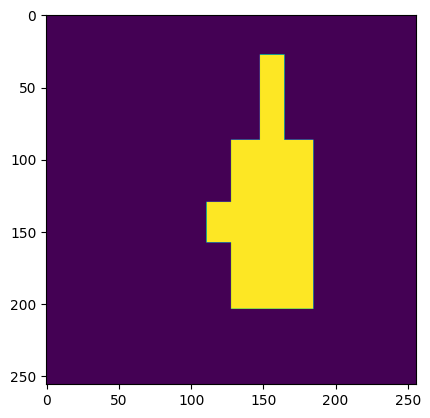

In [94]:
plt.imshow(img[:, :, 2]==3)

In [96]:
# 各部屋のindexと，その壁から繋がる部屋のindexを表してる
data['ed_rm']

[[0],
 [0],
 [0],
 [0, 2],
 [1],
 [1],
 [1, 2],
 [1],
 [2, 4],
 [2],
 [2],
 [2, 3],
 [2, 1],
 [2, 0],
 [2],
 [2, 5],
 [2],
 [2],
 [2],
 [2],
 [3],
 [3, 2],
 [3],
 [3],
 [4],
 [4],
 [4, 2],
 [4],
 [5],
 [5],
 [5],
 [5, 2],
 [6, 1],
 [6],
 [6, 2],
 [6],
 [7],
 [7, 0],
 [7],
 [7, 2],
 [8],
 [8, 2],
 [8, 3],
 [8],
 [9, 4],
 [9],
 [9, 2],
 [9],
 [10],
 [10, 5],
 [10],
 [10, 2],
 [11, 2],
 [11],
 [11],
 [11]]